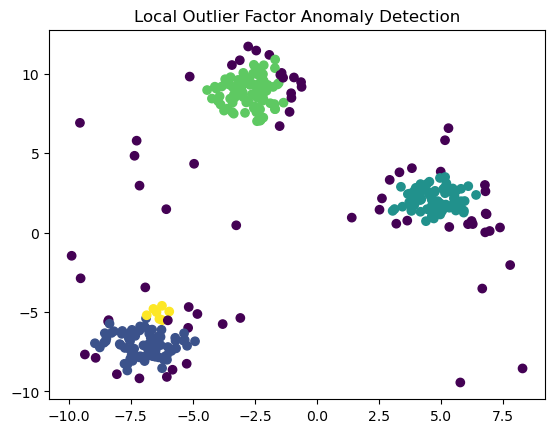

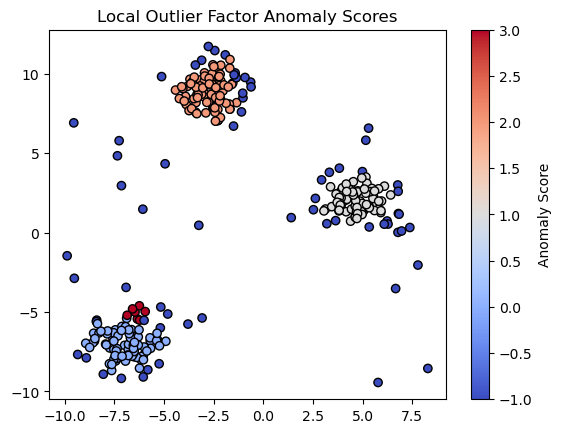

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
# Add some outliers
X = np.vstack([X, np.random.uniform(low=-10, high=10, size=(20, 2))])

# Fit Local Outlier Factor
dbscan = DBSCAN(eps=0.6, min_samples=7)
y_pred = dbscan.fit_predict(X)

# Anomaly scores
anomaly_scores = dbscan.labels_

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Local Outlier Factor Anomaly Detection")
plt.show()

# Plot anomaly scores
plt.scatter(X[:, 0], X[:, 1], c=anomaly_scores, cmap='coolwarm', edgecolor='k')
plt.colorbar(label='Anomaly Score')
plt.title("Local Outlier Factor Anomaly Scores")
plt.show()


In [7]:
from itertools import product
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define parameter grid
param_grid = {
    'eps': np.linspace(0.1, 1.0, 10),
    'min_samples': range(2, 11)
}

# Generate all combinations of parameters
param_combinations = list(product(param_grid['eps'], param_grid['min_samples']))

# Function to evaluate clustering
def evaluate_clustering(X, labels):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(X, labels)
        calinski_harabasz = calinski_harabasz_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
    else:
        silhouette = -1
        calinski_harabasz = -1
        davies_bouldin = -1
    return silhouette, calinski_harabasz, davies_bouldin

# Grid search for best parameters
best_params = None
best_scores = (-1, -1, -1)
results = []

for params in param_combinations:
    eps, min_samples = params
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_scaled)
    scores = evaluate_clustering(X_scaled, labels)
    results.append((params, scores))
    if scores[0] > best_scores[0]:
        best_scores = scores
        best_params = params

print("Best Parameters:", best_params)
print("Best Scores (Silhouette, Calinski-Harabasz, Davies-Bouldin):", best_scores)

Best Parameters: (0.6, 7)
Best Scores (Silhouette, Calinski-Harabasz, Davies-Bouldin): (0.7956362254429683, 1602.1184411584525, 1.5123841763039039)
